<a href="https://colab.research.google.com/github/adilimam12/unsupervised_learning_capstone-project4/blob/main/online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online retail customer segmentation**

Unsupervised learning project

---

Team curio monks

Adil imam

#**Github links**

---

Adil imam



**Project summary**

---



# Problem Description

---

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Business Objective:**
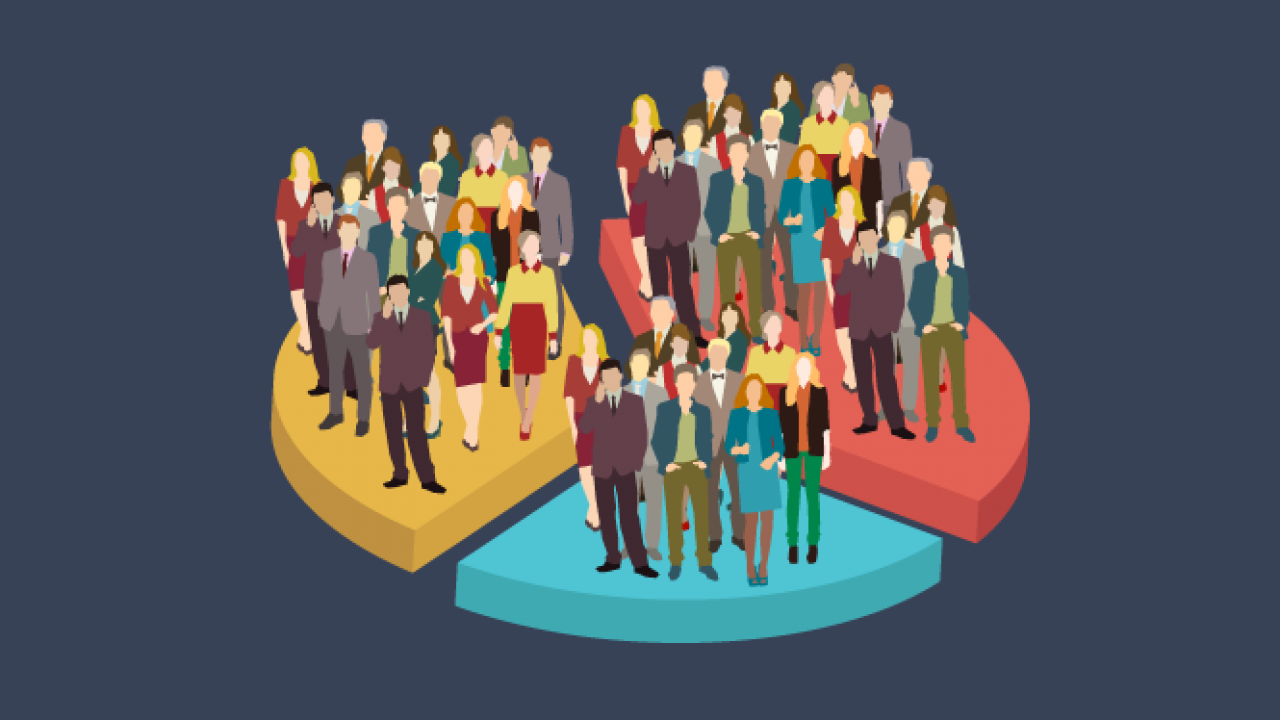

Customer segmentation is the practice of grouping the consumers of a firm into categories that represent the similarities among the customers in each category. In order to optimize each customer's value to the company, it is important to segment customers in order to determine how to interact with them.
Customer segmentation may enable marketers to reach out to each customer in the most efficient manner. A customer segmentation analysis enables marketers to accurately identify distinct groups of customers based on demographic, behavioral, and other factors by utilizing the vast amount of customer (and potential customer) data accessible.

***Importing Libraries***

---



In [1]:
 #Data Wrangling
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Model Building Prerequisits
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Evaluation Metrics
from sklearn.metrics import silhouette_score, silhouette_samples

#To getSilhouette Visualization
from yellowbrick.cluster import SilhouetteVisualizer

#Models used
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#To get clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage

#Supress future warnings
import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
retail_data=pd.read_csv('/content/drive/MyDrive/almabetter/capstone 4/Online Retail.csv')

**Some insights of the data**

---



In [4]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


*This Dataset contains features like *

---
InvoiceNo: Invoice number. Nominal, a six-digit integral number assigned to each transaction specifically. This code denotes a cancellation if it begins with the letter "c.".

StockCode: Product (item) code. A 5-digit integral number known as the nominal is assigned to each unique product.

Description: Name of the Product (Item). Nominal.

Quantity: The number of each item (product) in each transaction. Numeric.

InvoiceDate: Invoice Time and date. The day and time that each transaction was created, represented by a number.

UnitPrice: Unit pricing. Numeric, Sterling unit price for the product.

CustomerID: Customer number. Nominal, a five-digit integral number assigned to every customer uniquely.

Country: Country name. Nominal, the name of the country in which each customer resides.


**Exploring the dataframe**

In [5]:
#getting the shape of the data
retail_data.shape

(541909, 8)

No of rows 541909

No of columns 8

---



*let's look for all the features present in our dataset*

In [6]:
#checking all the columns
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
#datatype of the column
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are 3 numerical, 1 Date-Time and 4 catagorical features present in our dataset.

In [8]:
# Check the unique values
retail_data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Most no of unique values are in InvoiceNo 25900 followed by InvoiceDate 23260



In [9]:
#checking the statistical details of all features
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
#looking for duplicates
retail_data.duplicated().sum()

5268

There are 5268 duplicate values present in our dataset

*Let's check null values*

---







<AxesSubplot:>

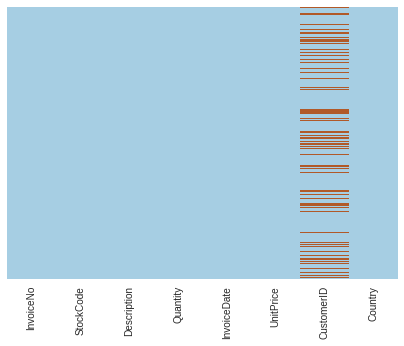

In [11]:
# check for Null values
plt.rcParams['figure.figsize'] = (7, 5)
sns.heatmap(retail_data.isnull(), cbar=False,yticklabels=False,cmap='Paired')


'CustomerID' column seems to contain a lot of missing values. Let's check how much of these constitute in our data

In [12]:
#Checking percentage of missing values in our data.
print(round(retail_data[['CustomerID', 'Description']].isnull().sum()/len(retail_data)*100,2))

CustomerID     24.93
Description     0.27
dtype: float64


Missing value treatment

The observations suggest that about 25% of data does not have a CustomerID.
Which means these purchases haven't been assigned to any customer.
We must remove these observations as these do not help us in forming clusters, as these can't be related to a CustomerID.
We can also remove missing values from the 'Description' feature.

#Data Cleaning

In [13]:
#dropping null values
retail_data.dropna(inplace=True)

In [14]:
# Information about the dataset after drop the null values:
retail_data.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


After removing all the null values the observation in our dataset reduces to (406829, 8).

*Duplicate values treatment*

---



In [15]:
#Dropping duplicate observations
retail_data.drop_duplicates(inplace=True)

In [16]:
#checking the shape after dropping the duplicate
retail_data.shape

(401604, 8)

After removing the duplicate values the shape of the dataset changes to(401604, 8)

As given in the data dictionary, some values in 'InvoiceNo' column contain observations beginning with 'c'

"If this code (InvoiceNo) starts with letter 'c', it indicates a cancellation"

We will drop these rows.

In [17]:
#Converting 'InvoiceNo' to string
retail_data['InvoiceNo'] =retail_data['InvoiceNo'].astype('str')

In [18]:
#Viewing these observations
retail_data[retail_data['InvoiceNo'].str.contains('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [19]:
#Removing observations with InvoiceNo beginning with 'c'
retail_data = retail_data[~retail_data['InvoiceNo'].str.contains('C')]

In [20]:
#Dataset shape after removing observations with InvoiceNo beginning with 'c'
retail_data.shape

(392732, 8)

Our dataset no more contains any missing or duplicate values.
We are left with 392732 rows after cleaning the data.

# Feature Engineering

*Date time features*

---



In [21]:
from datetime import datetime

In [22]:
# Convert InvoiceDate columns into date time format:
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], infer_datetime_format=True)

In [23]:
#Extracting the Year
retail_data["Year"] = retail_data["InvoiceDate"].apply(lambda x: x.year)

#Extracting the Month Name
retail_data['Month'] =retail_data["InvoiceDate"].apply(lambda x: x.month_name())

#Extracting the Month Number
retail_data['MonthNum'] = retail_data["InvoiceDate"].apply(lambda x: x.month)

#Extracting the Day Name
retail_data['Day'] = retail_data["InvoiceDate"].apply(lambda x: x.day_name())

#Extracting the Day Number
retail_data["DayNum"]= retail_data["InvoiceDate"].apply(lambda x: x.day)

#Extracting the Hour
retail_data["Hour"] = retail_data["InvoiceDate"].apply(lambda x: x.hour)

#Extracting the Minute
retail_data["Minute"] = retail_data["InvoiceDate"].apply(lambda x: x.minute)

Now that we have extracted time features(Hour, Minute) we can divide these times of the day to get a catagorical feature called 'DayPart'.
'DayPart' gives us the part of the day(Morning, Afternoon, Evening) based on the hour of that day.

In [24]:
#Extracting 'DayPart' from 'Hour' feature
retail_data['DayPart'] =retail_data["Hour"].apply( lambda x : 'Morning' if 6<=x<=11 else ('Afternoon' if 12<=x<=17 else 'Evening'))  
                           

TotalAmount

'Quantity' feature gives us the quantity of product in one transaction
'UnitPrice' feature gives us the price of product per unit
We can multiply these values to get the total amount per transaction

In [25]:
#Extracting 'TotalAmount' feature from 'Quantity' and 'UnitPrice'
retail_data['TotalAmount']=retail_data['Quantity']*retail_data['UnitPrice']

In [26]:
#data overviewing afterfeature engineering
retail_data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthNum,Day,DayNum,Hour,Minute,DayPart,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,12,Wednesday,1,8,26,Morning,20.34


We have constructed 9 new features out of which 8 give us the information about the date and time saperately and 1 gives the total amount of transaction.

# **Exploratory Data Analysis**

---

***Description***


In [27]:
#plotting top5 products
prod_count=retail_data['Description'].value_counts().reset_index()
prod_count.rename(columns = {'index' : 'Description_Name'}, inplace = True)
prod_count.rename(columns={'Description':'count'},inplace=True)
prod_count.head(5)

,Description_Name,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


<AxesSubplot:title={'center':'Top Five Product'}, xlabel='Description_Name', ylabel='count'>

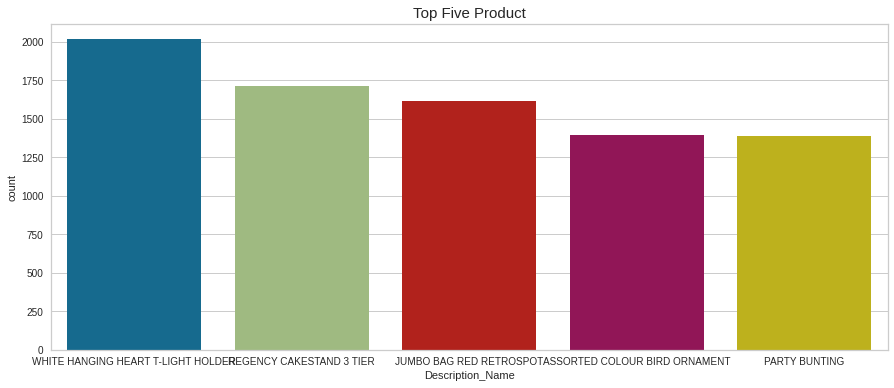

In [28]:
# Plotting top 5 product:
plt.figure(figsize=(15,6))
plt.title('Top Five Product', fontsize=15 )
sns.barplot(x='Description_Name', y='count', data = prod_count.head(5))

Top 5 product based on maximum selling are :

WHITE HANGING HEART T-LIGHT HOLDER,

REGENCY CAKESTAND 3 TIER

JUMBO BAG RED RETROSPOT

PARTY BUNTING

LUNCH BAG RED RETROSPOT

<AxesSubplot:title={'center':'Bottom Five Product'}, xlabel='Description_Name', ylabel='count'>

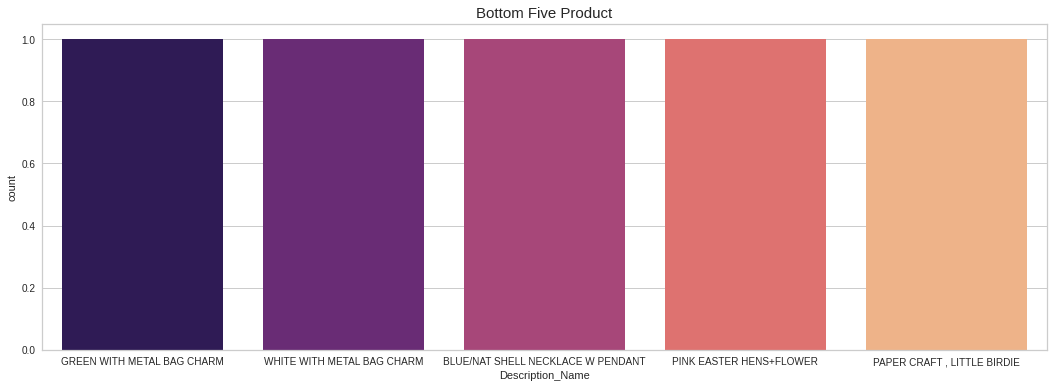

In [29]:
# Plotting bottom 5 product:
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product', fontsize=15)
sns.barplot(data = prod_count[-5:], x='Description_Name', y='count',palette ='magma')

Bottom 5 Product based on the selling are:

GREEN WITH METAL BAG CHARM

WHITE WITH METAL BAG CHARM

BLUE/NAT SHELL NECKLACE W PENDANT

PINK EASTER HENS+FLOWER


PAPER CRAFT , LITTLE BIRDIE

***Most Expensive and Cheapest Products per Unit***

---



In [30]:
#Creating a dataframe that gives the product names with their unit price
prod_price=retail_data.groupby('Description').sum()['UnitPrice'].reset_index().sort_values('UnitPrice',ascending=False)

<AxesSubplot:title={'center':'5 Most Expensive Products'}, xlabel='Description', ylabel='UnitPrice'>

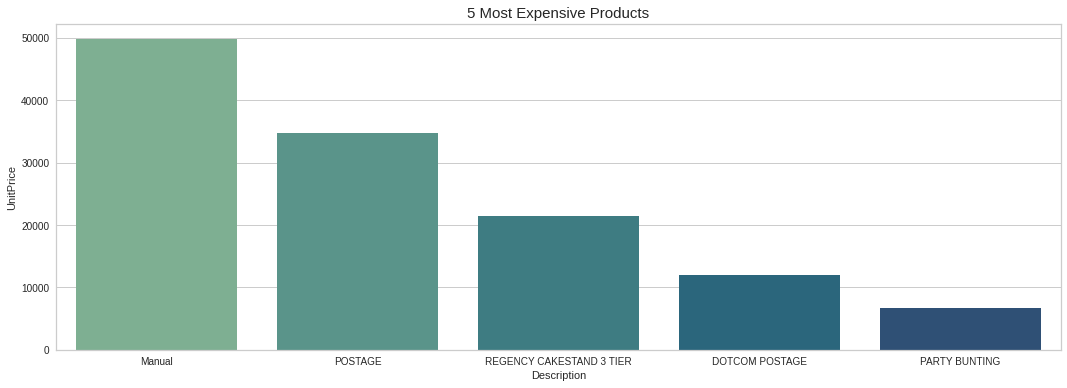

In [31]:
#Plotting Top 5
plt.figure(figsize=(18,6))
plt.title('5 Most Expensive Products', fontsize=15)
sns.barplot(data = prod_price[:5], x='Description', y='UnitPrice',palette ='crest')

<AxesSubplot:title={'center':'5 Cheapest Products'}, xlabel='Description', ylabel='UnitPrice'>

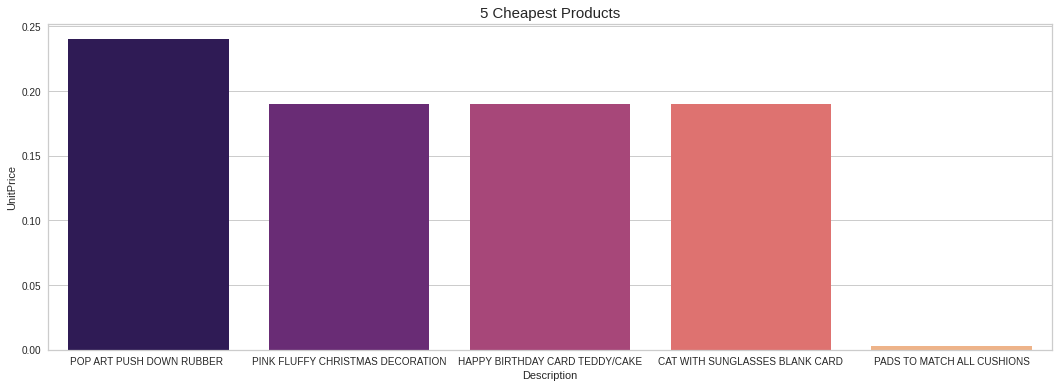

In [32]:
#plotting bottom 5
plt.figure(figsize=(18,6))
plt.title('5 Cheapest Products', fontsize=15)
sns.barplot(data = prod_price[-5:], x='Description', y='UnitPrice',palette ='magma')

Manual is the costliest product and PADS TO MATCH ALL CUSHIONS is the cheapest product

***Top and Bottom Products (Based on Total Revenue)***

---



In [33]:
#Creating a dataframe that gives the product names and their total revenue
prod_rev=retail_data.groupby('Description').sum()['TotalAmount'].reset_index().sort_values('TotalAmount',ascending=False)

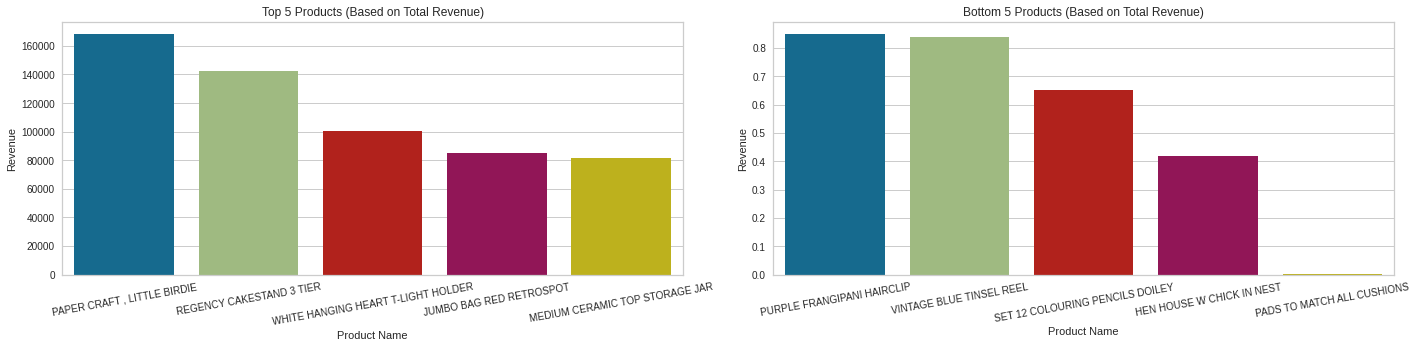

In [34]:
#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Description', y='TotalAmount',data = prod_rev[:5])
g1.set_xticklabels(g1.get_xticklabels(), rotation=10)
g1.set(title='Top 5 Products (Based on Total Revenue)', xlabel='Product Name', ylabel='Revenue')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Description', y='TotalAmount',data = prod_rev[-5:])
g2.set_xticklabels(g2.get_xticklabels(), rotation=10)
g2.set(title='Bottom 5 Products (Based on Total Revenue)', xlabel='Product Name', ylabel='Revenue')
plt.tight_layout()

PAPER CRAFT LITTLE BIRDIE makes the most revenue.

***Transactions w.r.t Date and Time***

---



In [35]:
# Finding Per Day Transaction
per_day=retail_data['Day'].value_counts().reset_index()
per_day.rename(columns = {'index' : 'Day_name'}, inplace = True)
per_day.rename(columns = {'Day' : 'Count'}, inplace = True)
per_day

,Day_name,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


<AxesSubplot:title={'center':'Transaction per Day'}, xlabel='Day_name', ylabel='Count'>

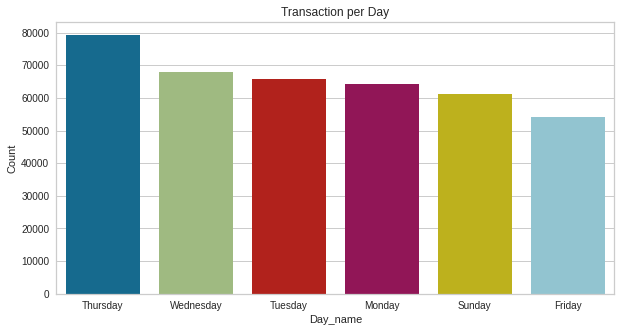

In [36]:
# Bar Plot Per Day Transaction:
plt.figure(figsize=(10,5))
plt.title('Transaction per Day')
sns.barplot(x='Day_name',y='Count',data=per_day)

In [37]:
# Finding Per month Transaction
per_month=retail_data['Month'].value_counts().reset_index()
per_month.rename(columns = {'index' : 'Month_name'}, inplace = True)
per_month.rename(columns = {'Month' : 'Count'}, inplace = True)
per_month

,Month_name,Count
0,November,63182
1,October,48796
2,December,42699
3,September,39671
4,May,28075
5,June,26926
6,March,26872
7,August,26796
8,July,26582
9,April,22435


<AxesSubplot:title={'center':'Transaction per Month'}, xlabel='Month_name', ylabel='Count'>

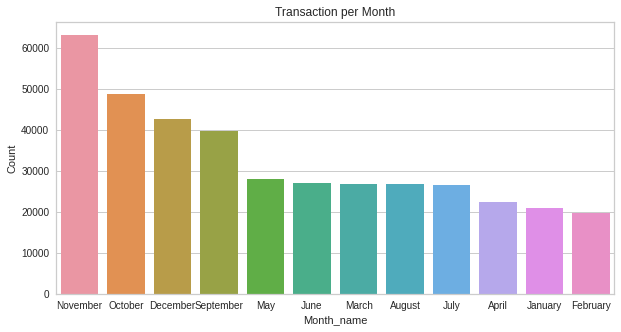

In [38]:
# Bar Plot Per month Transaction:
plt.figure(figsize=(10,5))
plt.title('Transaction per Month')
sns.barplot(x='Month_name',y='Count',data=per_month)

In [39]:
# Finding Per hour Transaction
per_hour=retail_data['Hour'].value_counts().reset_index()
per_hour.rename(columns = {'index' : 'hour'}, inplace = True)
per_hour.rename(columns = {'Hour' : 'Count'}, inplace = True)
per_hour

,hour,Count
0,12,70942
1,13,63024
2,14,53260
3,11,48373
4,15,44793
5,10,37775
6,16,23719
7,9,21928
8,17,12942
9,8,8688


<AxesSubplot:title={'center':'Transaction per Hour'}, xlabel='hour', ylabel='Count'>

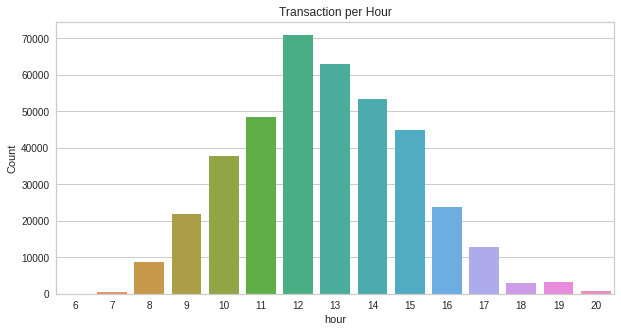

In [40]:
# Bar Plot Per hourTransaction:
plt.figure(figsize=(10,5))
plt.title('Transaction per Hour')
sns.barplot(x='hour',y='Count',data=per_hour)

In [41]:
# Finding Per day part Transaction
day_part=retail_data['DayPart'].value_counts().reset_index()
day_part.rename(columns = {'index' : 'Part'}, inplace = True)
day_part.rename(columns = {'DayPart' : 'Count'}, inplace = True)
day_part

,Part,Count
0,Afternoon,268680
1,Morning,117144
2,Evening,6908


<AxesSubplot:title={'center':'Transaction per day part'}, xlabel='Part', ylabel='Count'>

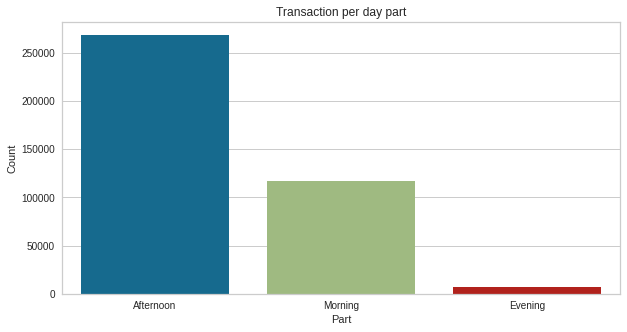

In [42]:
# Bar Plot Per hourTransaction:
plt.figure(figsize=(10,5))
plt.title('Transaction per day part')
sns.barplot(x='Part',y='Count',data=day_part)

November is the busiest month, followed by October and December.

Thursday is the busiest day of the week.

12 pm is the peak hour of transactions.

Most orders are placed in the afternoon.

***Location Based Analysis***

---

**Top and Bottom Countries (Based on Number of Transactions)**

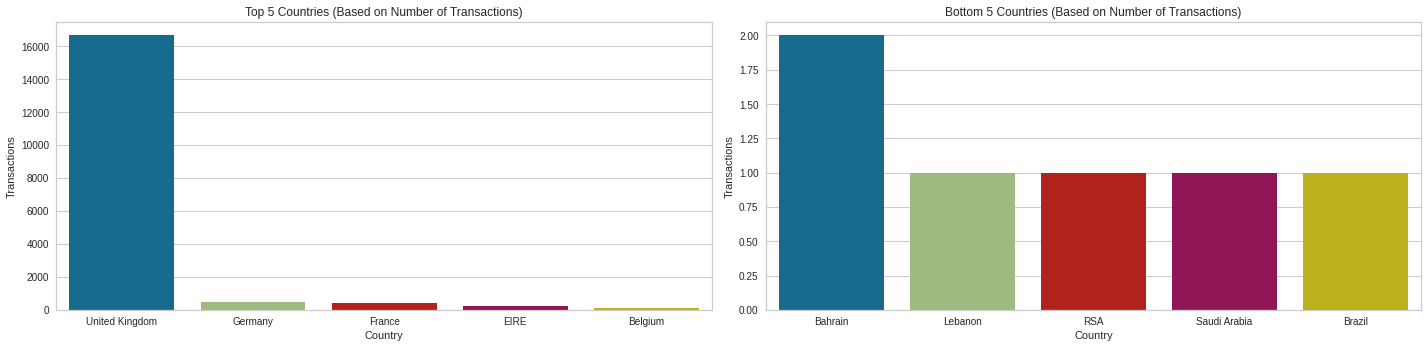

In [43]:
#Creating a dataframe that gives the country names and the count of their transactions
Country_transac = retail_data.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Country', y='InvoiceNo',data = Country_transac[:5])
g1.set(title='Top 5 Countries (Based on Number of Transactions)', xlabel='Country', ylabel='Transactions')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Country', y='InvoiceNo',data = Country_transac[-5:])
g2.set(title='Bottom 5 Countries (Based on Number of Transactions)', xlabel='Country', ylabel='Transactions')
plt.tight_layout()

From the above graph, it is clear that the United Kingdom has more transactions than other nations, indicating that it has a larger likelihood of making a purchase than Germany, France, Ireland, and Spain.

Lebanon, RSA Country, Saudi Arabia and Brazil have the least number of orders placed.

---




**Top and Bottom Countries (Based on Number of Customers)**

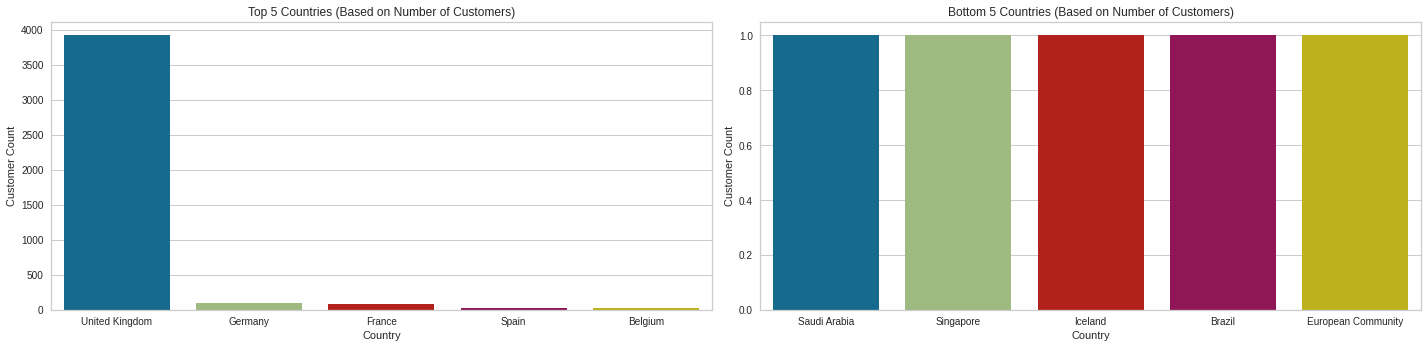

In [44]:
#Creating a dataframe that gives the country names and the count of the customers
country_cust = retail_data.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)

#Instantiating subplots
fig, axes = plt.subplots(1, 2, figsize=(20,5))

#Plotting Top 5
g1 = sns.barplot(ax = axes[0], x='Country', y='CustomerID',data = country_cust[:5])
g1.set(title='Top 5 Countries (Based on Number of Customers)', xlabel='Country', ylabel='Customer Count')

#Plotting Bottom 5
g2 = sns.barplot(ax = axes[1], x='Country', y='CustomerID',data = country_cust[-5:])
g2.set(title='Bottom 5 Countries (Based on Number of Customers)', xlabel='Country', ylabel='Customer Count')
plt.tight_layout()

Most customers are based in the UK.

***Correlation matrix***

---



<AxesSubplot:>

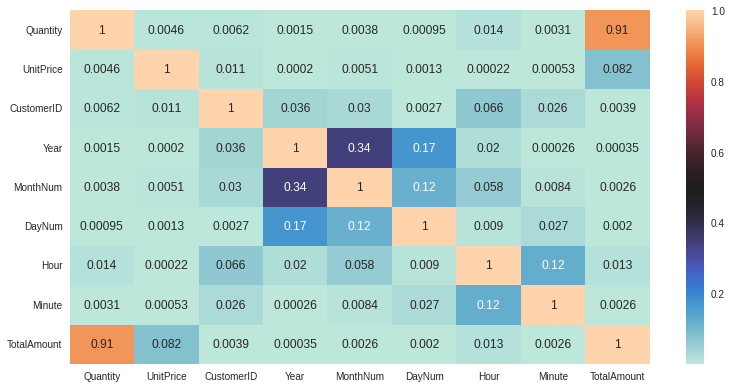

In [45]:
# Plotting heatmap to show correlation of different variables
plt.figure(figsize=(13,6.5))
correlation = retail_data.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "icefire")
     

As we can see Quantity and Total Amount are highly correlated

**Distribution of Numeric Features**

---




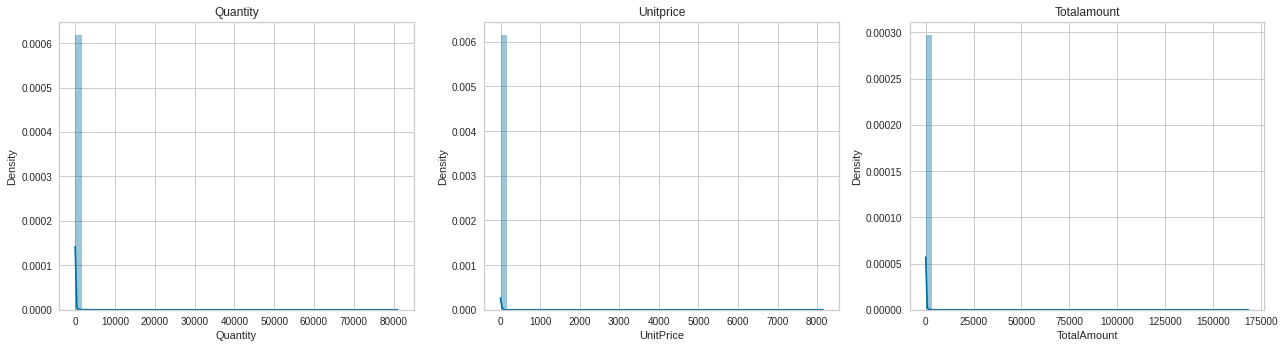

In [46]:
#Columns to analyse distribution
cols = ['Quantity','UnitPrice','TotalAmount']

#Plotting the distribution
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(retail_data[col])
  plt.title(col.title())
  plt.tight_layout()

We can see that the 'Quantity', 'UnitPrice', 'TotalAmount' are all positively skewed.(mean > median > mode)

Ideally  these features must be symmetric.(mean = median = mode)
For this we must apply some kind of transformation to make these distributions close symmetric.

Here, we will encorporate logarithmic transformation.

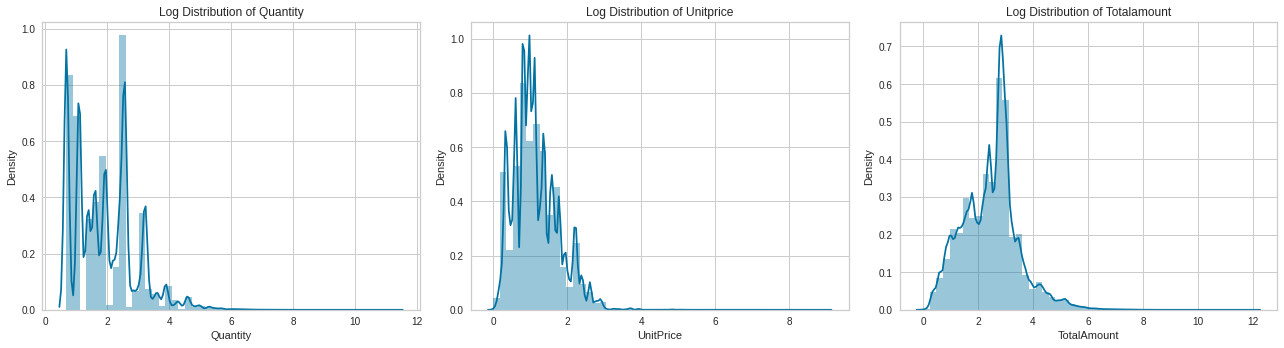

In [47]:
#Columns to analyse distribution
cols = ['Quantity','UnitPrice','TotalAmount']

#Plotting the distribution of log transformed features 
plt.figure(figsize=(18,5))
for n,col in enumerate(cols):
  plt.subplot(1, 3, n+1)
  sns.distplot(np.log1p(retail_data[col]))
  plt.title(f'Log Distribution of {col.title()}')
  plt.tight_layout()

# **Recency, Frequency, Monetary (RFM) Model**

---


**Recency, Frequency, Monetary** value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

Recency: How recently a customer has made a purchase

Frequency: How often a customer makes a purchase.

Monetary Value: How much money a customer spends on

**Performing RFM Segmentation and RFM Analysis:**

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.

The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

This approach does not require machine learning algorithms as segmentation can be done manually.


***Creating RFM Dataframe***

---
We will formulate the RFM dataset as follows

Recency = Latest Date - Last Invoice Data

Frequency = Count of invoice no. of transaction(s)

Monetary = Sum of total amount for each customer


In [48]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create Recency-Frequency-Monetary Modelling scores for each customer
rfm_df = retail_data.groupby('CustomerID').agg(
                                      {'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                       'InvoiceNo': lambda x: len(x), 
                                       'TotalAmount': lambda x: x.sum()}
                                        )

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


***Getting R, F, and M scores***

---
We will now get the individual scores for R, F and M by splitting Recency, Frequency and Monetary values into 4 buckets based on their quantiles.


In [49]:
#Applying quantile cut method to saperate the column values based on their quantiles and assign labels
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


***Getting the RFM groups and scores for each customer***

---

We will group the R, F and M values to get the groups for each customer.

Explaination:
Best Customer - If a customer belongs to group 444, they have made a purchase very recently and has high frequency and monetary value.

Worst Customer - If a customer belongs to group 111, it means made a purchase a long time ago and has low frequency and monetary value.

We will give every customer an RFM score based on their individual R, F and M values.

Explaination:

Best Customer - High RFM Score

Worst Customer - Low RFM Score

In [50]:
#Getting RFM groups
rfm_df['RFM_Group'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Getting RFM scores
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12347.0,2,182,4310.00,4,4,4,444,12
2,12348.0,75,31,1797.24,2,2,4,224,8
3,12349.0,18,73,1757.55,3,3,4,334,10
4,12350.0,310,17,334.40,1,1,2,112,4


***Distribution of Recency, Frequency and Monetary Features***

---



<AxesSubplot:xlabel='Recency', ylabel='Density'>

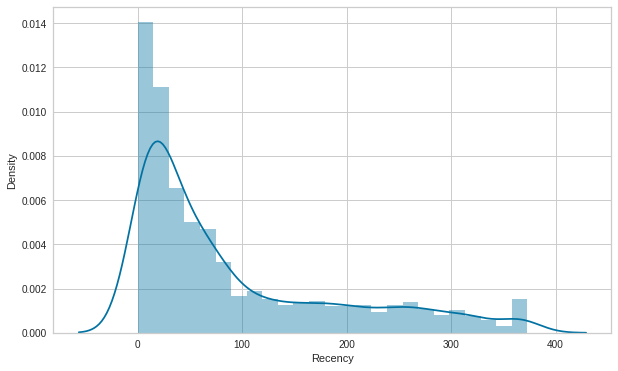

In [51]:
# Recency Distribution Plot
rfm_plot =rfm_df ['Recency']

plt.figure(figsize=(10,6))
sns.distplot(rfm_plot)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

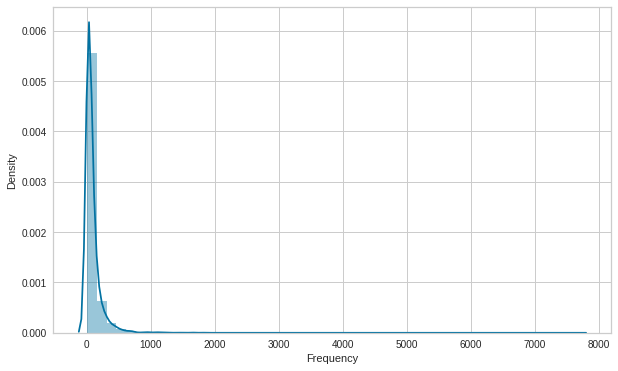

In [52]:
# Desriptive Statistics (Frequency):
rfm_plot = rfm_df['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(rfm_plot)

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

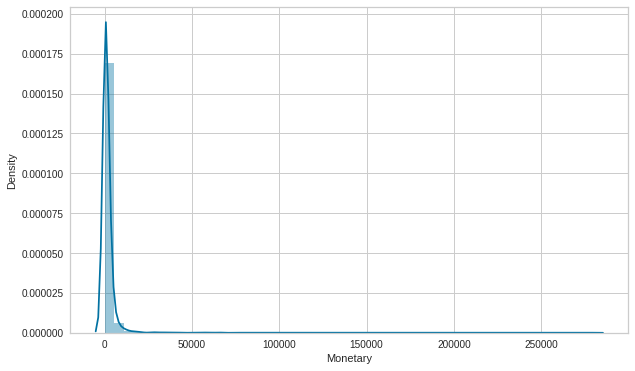

In [53]:
# Descriptive Staistics (Monetary)
rfm_plot = rfm_df['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(rfm_plot)

The distributions all look skewed towards right.

We can transform these features to make the distributions as close to a normal distributio as possible.

We will apply log transformation here

In [54]:
#Replacing all the zero values to 1 to run the transformation without a hassle
rfm_df.replace(0.0,1,inplace=True)

#Applying Log transformation
rfm_df['Recency_Log']   = rfm_df['Recency'].apply(np.log)
rfm_df['Frequency_Log'] = rfm_df['Frequency'].apply(np.log)
rfm_df['Monetary_Log']  = rfm_df['Monetary'].apply(np.log)

#Viewing the RFM data
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
0,12346.0,325,1,77183.60,1,1,4,114,6,5.783825,0.000000,11.253942
1,12347.0,2,182,4310.00,4,4,4,444,12,0.693147,5.204007,8.368693
2,12348.0,75,31,1797.24,2,2,4,224,8,4.317488,3.433987,7.494007
3,12349.0,18,73,1757.55,3,3,4,334,10,2.890372,4.290459,7.471676
4,12350.0,310,17,334.40,1,1,2,112,4,5.736572,2.833213,5.812338


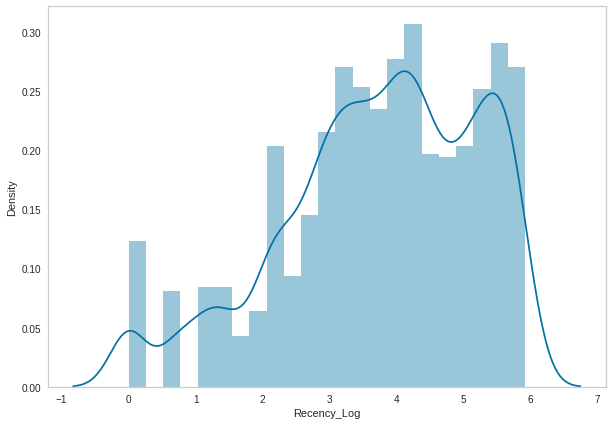

In [55]:
# After normalization for Recency, the distribution of data is as follows:
Recency_Plot = rfm_df['Recency_Log']
plt.figure(figsize=(10,7))
sns.distplot(Recency_Plot)
plt.grid()

<AxesSubplot:xlabel='Frequency_Log', ylabel='Density'>

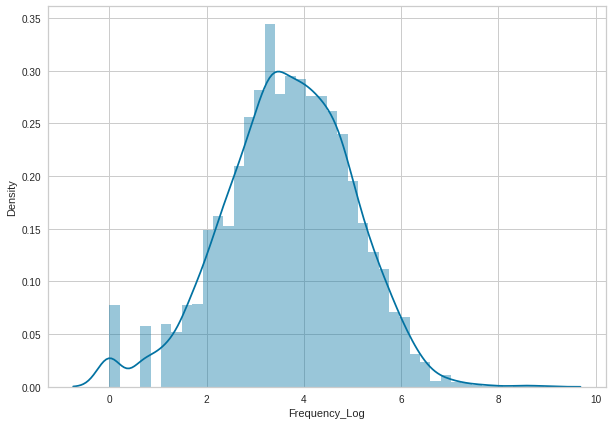

In [56]:
# After normalization for Frequency, the distribution of data is as follows:
Frequency_Plot = rfm_df['Frequency_Log']
plt.figure(figsize=(10,7))
sns.distplot(Frequency_Plot)

<AxesSubplot:xlabel='Monetary_Log', ylabel='Density'>

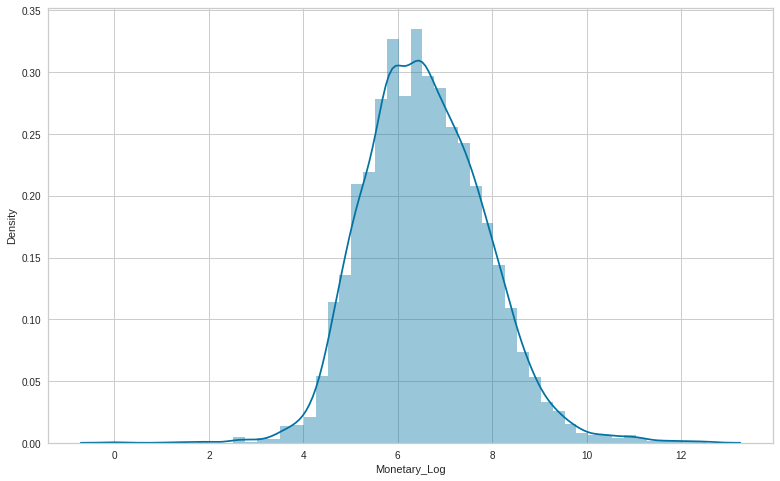

In [57]:
# After normalization for Monetary, the distribution of data is as follows:
Monetary_Plot = rfm_df['Monetary_Log']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

**Observations**

We have achieved Recency, Frequency and Monetary Values from the original transaction dataset.

We have grouped the values and also summed them up to get a heuristic prediction model.

We will use the log transformed values of Recency, Frequency and Monetary for prediction using Machine Learning Models.

**K- Means Clustring Implementation**

It can be summarized as the process of finding data subgroups where data points in the same subgroup (cluster) are extremely similar and other data points in other clusters are very different.

**Finding Optimal Number of Clusters**

There are two primary methods to define number of clusters:

Silhouette Score (math method)

Measures intra- and inter-cluster distance
Elbow criterion (visual method)

Plot number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster center

***Silhouette score method on Recency and Monetary***

---



In [58]:
from sklearn import preprocessing
# Applying Silhouette score method on Recency and Monetary
features_rec_mon = ['Recency_Log','Monetary_Log']
X_features_rec_mon = rfm_df[features_rec_mon].values
# Fit the model
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_
# Checking the silhouette score on clusters
  score = silhouette_score(X,preds)
  print(' For n_clusters = {}, silhouette sore is {}'.format (n_clusters, score))

 For n_clusters = 2, silhouette sore is 0.42043960957985754
 For n_clusters = 3, silhouette sore is 0.34153546826704995
 For n_clusters = 4, silhouette sore is 0.3647331611070875
 For n_clusters = 5, silhouette sore is 0.3367440388284878
 For n_clusters = 6, silhouette sore is 0.3438362737250992
 For n_clusters = 7, silhouette sore is 0.34459301854762464
 For n_clusters = 8, silhouette sore is 0.33910199818466574
 For n_clusters = 9, silhouette sore is 0.3455869607789315
 For n_clusters = 10, silhouette sore is 0.346755059016264
 For n_clusters = 11, silhouette sore is 0.3361257745509522
 For n_clusters = 12, silhouette sore is 0.33983919049731887
 For n_clusters = 13, silhouette sore is 0.3398385214921931
 For n_clusters = 14, silhouette sore is 0.3432823589916495


***Applying Elbow Method on Recency and Monetary***

---



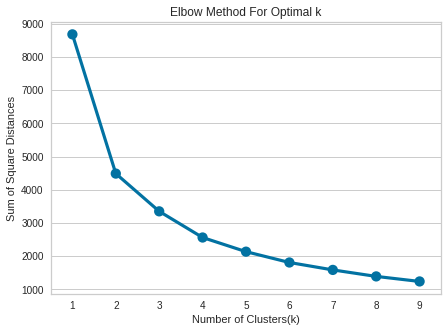

In [59]:
#elbow method 
features_rec_mon=['Recency_Log','Monetary_Log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

sum_of_sq_dist = {}
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters= k)
    kmeans = kmeans.fit(X)
    sum_of_sq_dist[k] = kmeans.inertia_


    
# Plotting the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***Visualising Silhouette Analysis for n-clusters***

---


We will get the SilhouSilhouette Analysis Visualisation for the number of clusters between 2 to 5 on a sample of the data.

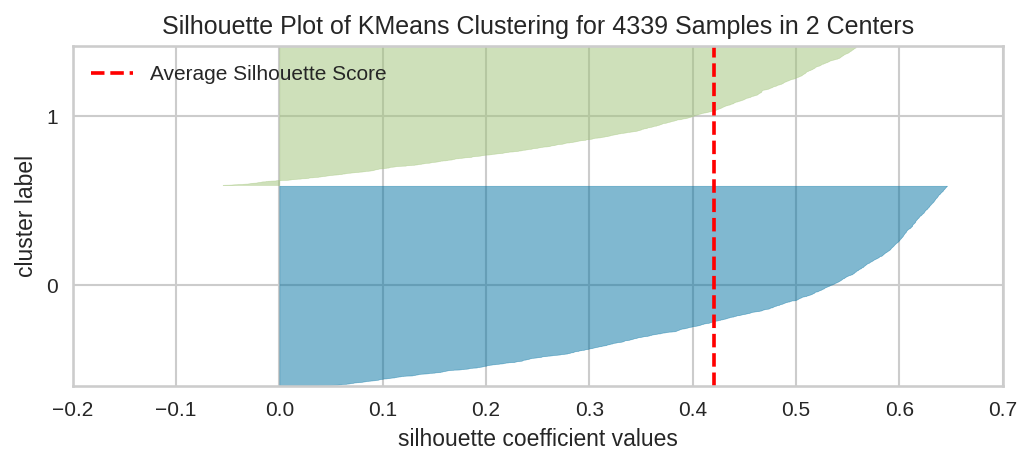

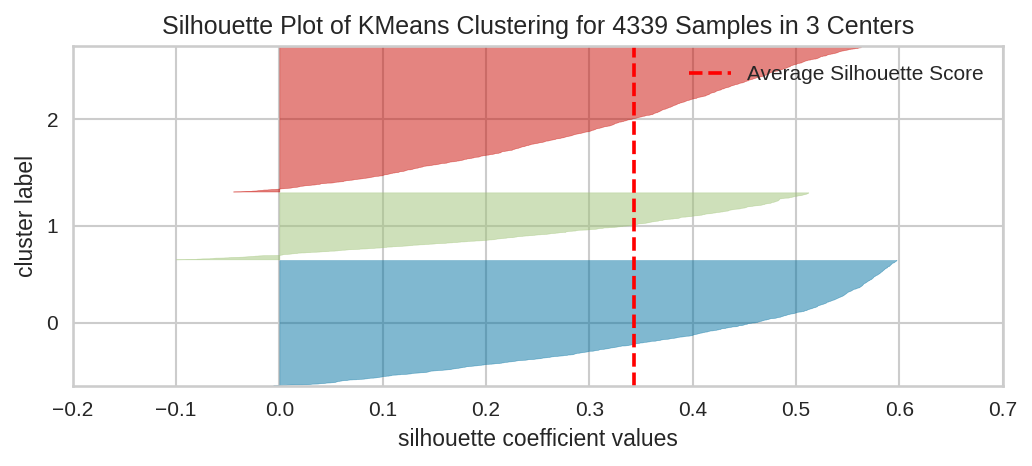

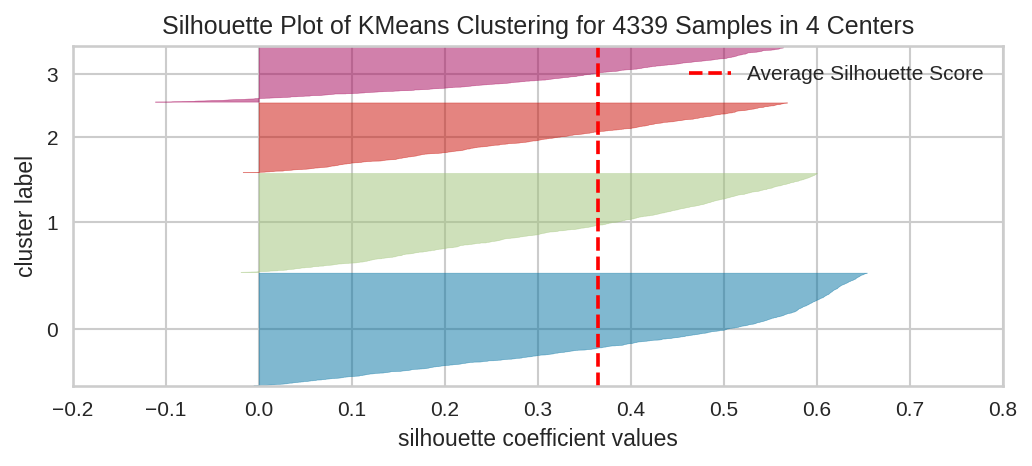

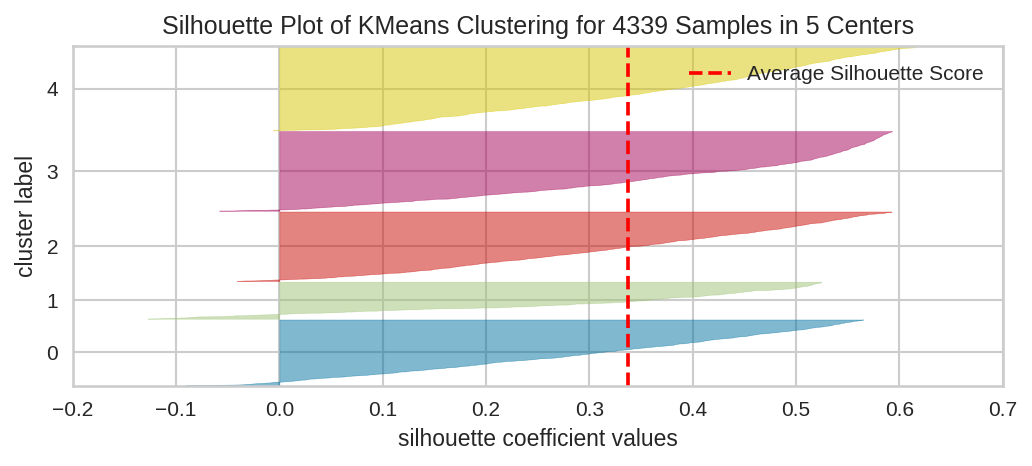

In [60]:
# Visualizing the Silouette plots for the clusters
for i in range(2,6):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    sil_vis=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    sil_vis.fit(X)
    sil_vis.show()

***Hyperparameter Tuning For the Best Value of K***

---



In [61]:

# Fit the Cluster and Predict the values:
# from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

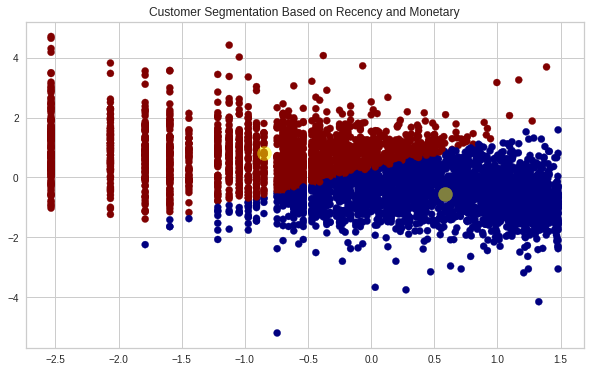

In [62]:

# Plot customer segmentation by taking k=2
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='jet')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)


When we separate customers by Recency and Monetary value, we can observe that they are well-separated.

***DBSCAN on Recency and Monetary***

---



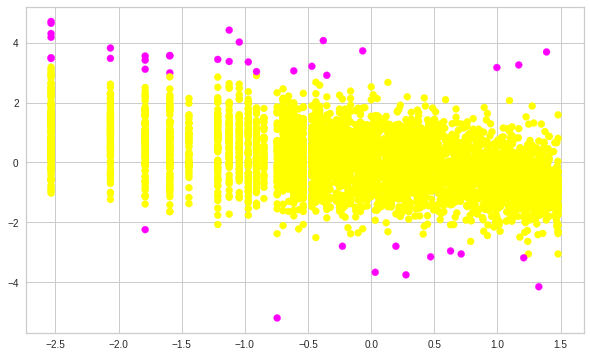

In [63]:
# Applying DBSCAN on Recency and Monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(10,6))

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='spring')

***Silhouette score method on Frequency and Monetary***

---



In [64]:
# Applying silhouette score method on Frequency and Monetary
features_fre_mon=['Frequency_Log','Monetary_Log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4784099179679686
For n_clusters = 3, silhouette score is 0.40773549715950697
For n_clusters = 4, silhouette score is 0.3720742719224853
For n_clusters = 5, silhouette score is 0.34666684083885896
For n_clusters = 6, silhouette score is 0.3623054918030238
For n_clusters = 7, silhouette score is 0.3447287335301106
For n_clusters = 8, silhouette score is 0.33114768095732494
For n_clusters = 9, silhouette score is 0.3393715685824522
For n_clusters = 10, silhouette score is 0.35854778543071486
For n_clusters = 11, silhouette score is 0.368322545034661
For n_clusters = 12, silhouette score is 0.354371918166071
For n_clusters = 13, silhouette score is 0.3616510217206493
For n_clusters = 14, silhouette score is 0.3576807488460978


***Elbow method on Frequency and Monetary***

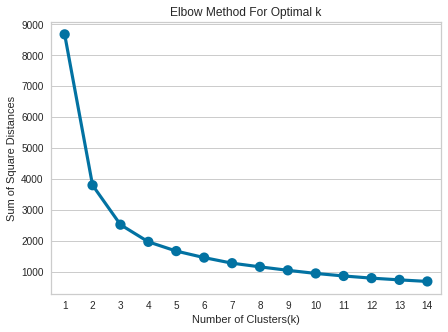

In [65]:
# Applying elbow method on Frequency and Monetary
sum_of_sq_dist = {}
for k in range (1,15):
  km = KMeans(n_clusters= k)
  km = km.fit(X)
  sum_of_sq_dist[k] = km.inertia_
     

# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***Hyperparameter Tuning For Best Value of K***

---



In [66]:
# Taking the number of clusters as 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

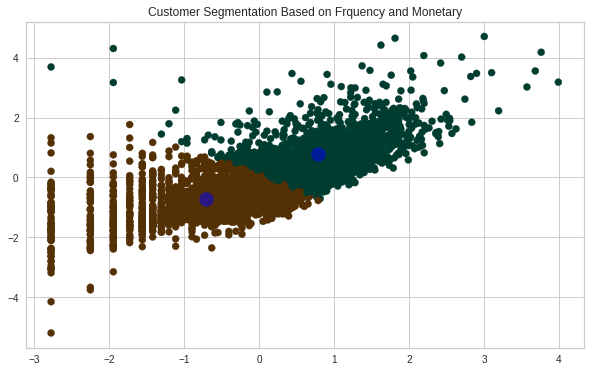

In [67]:
# Plot customer segmentation based on Fequency and Monetary
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Frquency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='BrBG')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)


***DBSCAN on Frequency and Monetary***

---



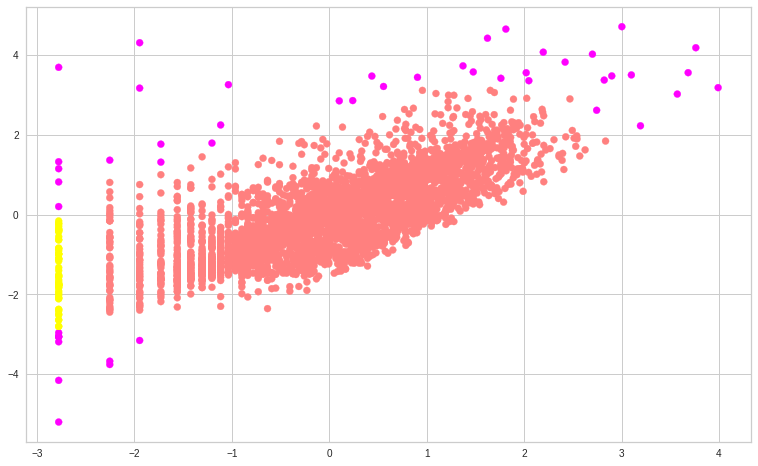

In [68]:
# Applying DBSCAN method on Frequency and Monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='spring')


***Applying Silhouette Method on Recency ,Frequency and Monetary***

In [69]:
# Applying Silhouette score method on Recency, Frequency and Monetary
features_rec_freq_mon = ['Recency_Log','Frequency_Log','Monetary_Log']
features_rec_freq_mon = rfm_df[features_rec_mon].values
# Fit the model
scaler_rec_freq_mon = preprocessing.StandardScaler()
X_rec_freq_mon = scaler_rec_freq_mon.fit_transform(features_rec_freq_mon )
X=X_rec_freq_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_
# Checking the silhouette score on clusters
  score = silhouette_score(X,preds)
  print(' For n_clusters = {}, silhouette sore is {}'.format (n_clusters, score))

 For n_clusters = 2, silhouette sore is 0.42043960957985754
 For n_clusters = 3, silhouette sore is 0.34263443602064747
 For n_clusters = 4, silhouette sore is 0.36478213643969093
 For n_clusters = 5, silhouette sore is 0.3345486238023238
 For n_clusters = 6, silhouette sore is 0.34370442811087304
 For n_clusters = 7, silhouette sore is 0.34726280756777783
 For n_clusters = 8, silhouette sore is 0.3391826175978501
 For n_clusters = 9, silhouette sore is 0.3449112523919694
 For n_clusters = 10, silhouette sore is 0.34804191929324746
 For n_clusters = 11, silhouette sore is 0.3369727707519496
 For n_clusters = 12, silhouette sore is 0.34177550797903755
 For n_clusters = 13, silhouette sore is 0.34118904242470927
 For n_clusters = 14, silhouette sore is 0.3420632591791378


***Applying Elbow Method on Recency ,Frequency and Monetary***

---



In [70]:
#Applying Elbow Method on Recency ,Frequency and Monetary
features_rec_freq_mon=['Recency_Log','Monetary_Log','Frequency_Log']
X_features_rec_freq_mon=rfm_df[features_rec_freq_mon].values
scaler_rec_freq_mon=preprocessing.StandardScaler()
X_rec_freq_mon=scaler_rec_freq_mon.fit_transform(X_features_rec_freq_mon)
X=X_rec_freq_mon

sum_of_sq_dist = {}
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters= k)
    kmeans = kmeans.fit(X)
    sum_of_sq_dist[k] = kmeans.inertia_




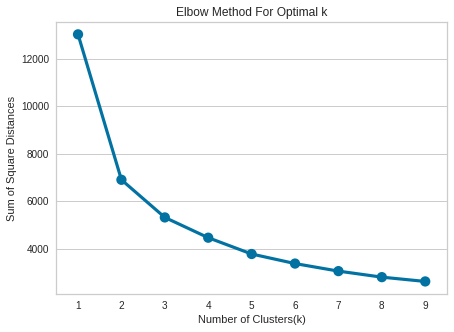

In [71]:
# Plotting the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

***Hyperparameter Tuning For the Best Value of K***

---



In [72]:
# Fit the Cluster and Predict the values:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

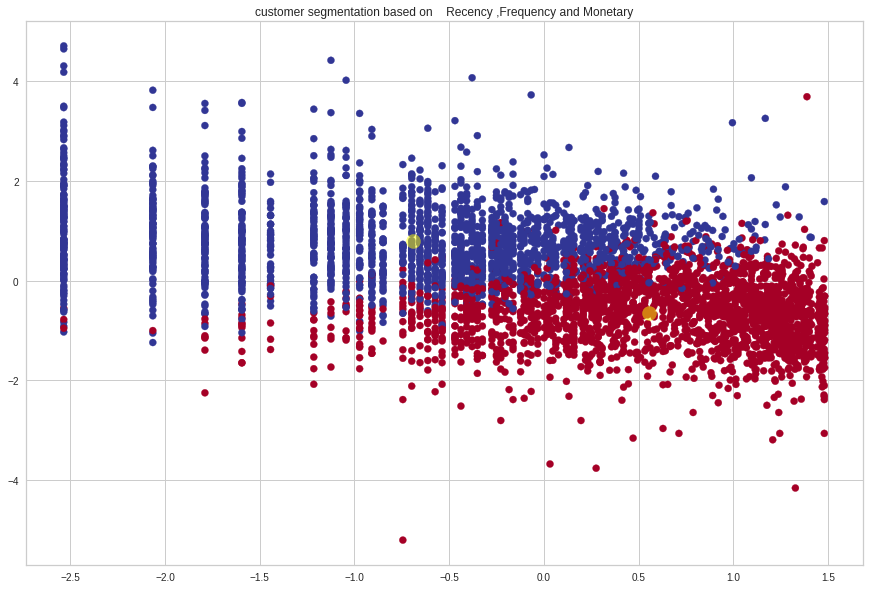

In [73]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')
 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

In [74]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)


KMeans(max_iter=1000, n_clusters=2)

In [75]:
#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,5.783825,0.000000,11.253942,0
12347.0,2,182,4310.00,4,4,4,444,12,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,2,2,4,224,8,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,3,3,4,334,10,2.890372,4.290459,7.471676,1
12350.0,310,17,334.40,1,1,2,112,4,5.736572,2.833213,5.812338,0
12352.0,36,85,2506.04,3,3,4,334,10,3.583519,4.442651,7.826459,1
12353.0,204,4,89.00,1,1,1,111,3,5.318120,1.386294,4.488636,0
12354.0,232,58,1079.40,1,3,3,133,7,5.446737,4.060443,6.984161,0
12355.0,214,13,459.40,1,1,2,112,4,5.365976,2.564949,6.129921,0


***Hierarchical Clustering***

---



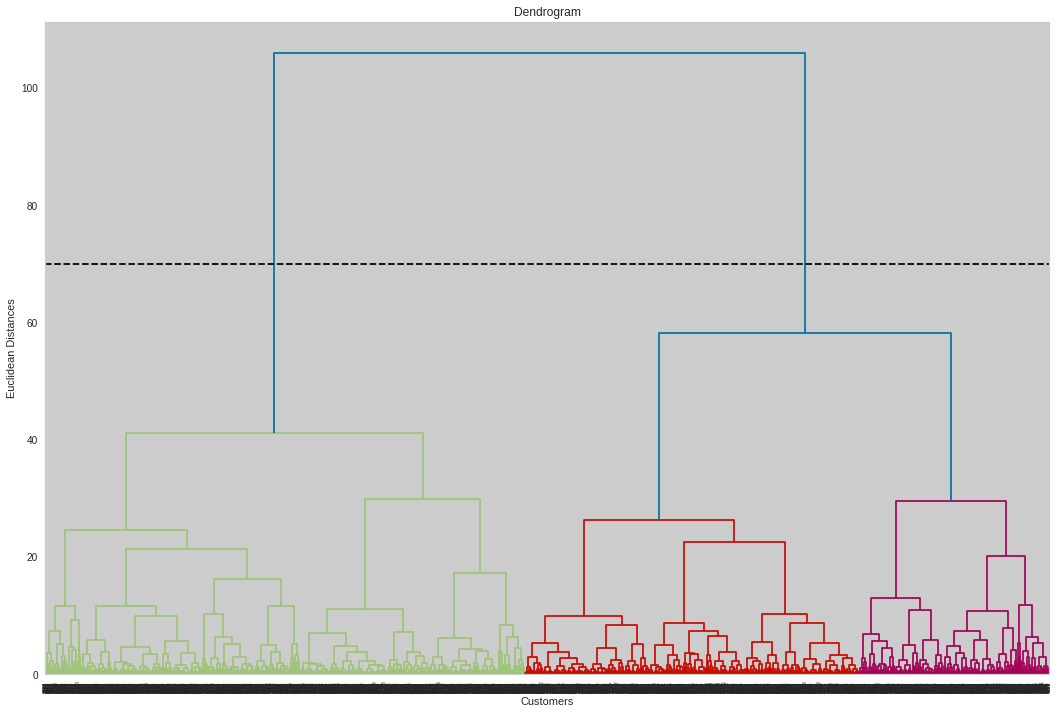

In [76]:
#Plotting Dendrogram to get optimal number of clusters

#Setting plot specs
plt.figure(figsize=(18,12))

#Using Ward's Linkage Method to Differ Similarities
dendrogram(linkage(X, method='ward'), color_threshold=50)

#Setting plot parameters
plt.title('Dendrogram')                                    
plt.xlabel('Customers')                                    
plt.ylabel('Euclidean Distances')    

#Setting Threshold at y=70
plt.axhline(y=70, color='black', linestyle='--')  

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90

No. of Cluster = 2

In [77]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

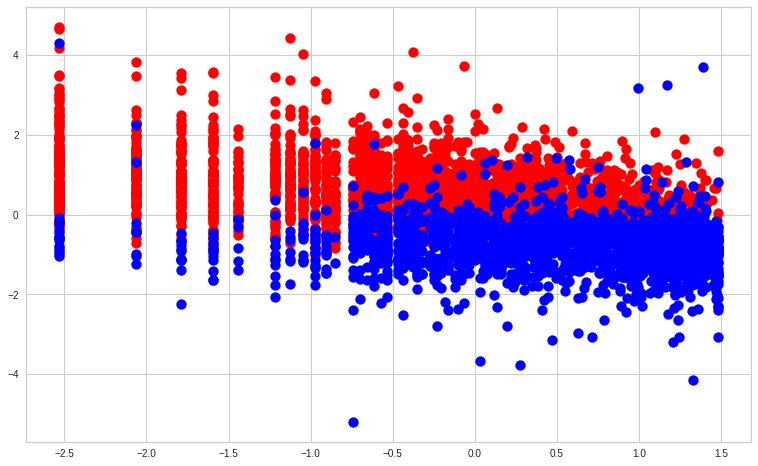

In [78]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

***Applying DBSCAN to Recency ,Frequency and Monetary***

---



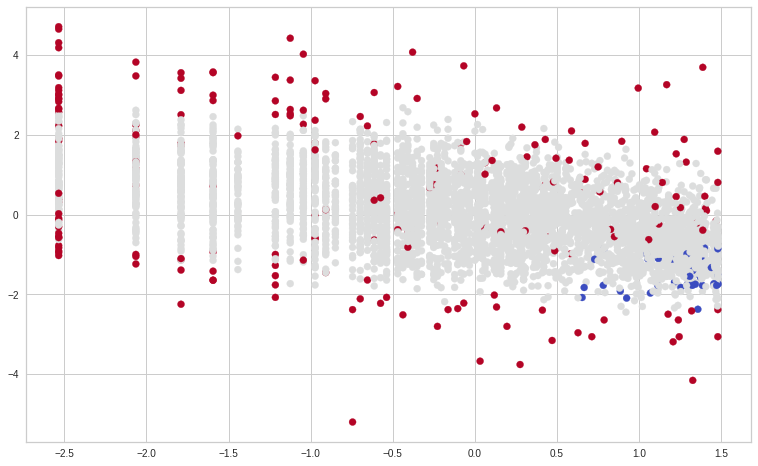

In [88]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='coolwarm_r')

we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3

---

#**Summary**


In [89]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])
 
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

#**Conclusion**

---




Initiating the task, we found that our raw data contains about 25% missing values and we also found some duplicate values. We performed data cleaning to get rid of these values and also cancelled orders.

We derived important business insights based on products, time and location.

We also performed feature engineering. This included deriving new date and time features and getting a new feature giving the total amount of transaction using price and quantity of order.

We then performed RFM analysis of the transaction data. This helped us gain importance metrics to build models for customer segmentation.

Model building included Segmentation Using RFM Scores(Heuristic Model) which gave us 4 major segments.

1.As K-means has the high score , it can be as used for the segmentation.

2.The model can help to segment the customers on the basis on which their activities.

3.The model helps to segment customer as it helps to target them with their interests with similar customers.